In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [2]:
house=pd.read_csv('housing.csv')

In [3]:
print(house.shape)

(20640, 10)


In [4]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
house['median_house_value'].value_counts()

500001    965
137500    122
162500    117
112500    103
187500     93
225000     92
350000     79
87500      78
275000     65
150000     64
175000     63
100000     62
125000     56
67500      55
250000     47
200000     46
118800     39
450000     37
156300     35
212500     33
181300     31
193800     31
300000     30
75000      30
55000      29
81300      29
93800      29
106300     28
143800     28
500000     27
         ... 
295700      1
409100      1
441900      1
368200      1
474700      1
426500      1
393700      1
483800      1
319200      1
25000       1
352000      1
418200      1
385400      1
384800      1
352600      1
442700      1
409900      1
287000      1
344300      1
270200      1
434400      1
376700      1
303000      1
368800      1
368600      1
32900       1
303200      1
311300      1
270400      1
41000       1
Name: median_house_value, Length: 3842, dtype: int64

In [7]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
house['total_bedrooms'] = house['total_bedrooms'].fillna(house['total_bedrooms'].mean())

In [9]:
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
house['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
cat_var =house.dtypes.loc[house.dtypes == 'object'].index
le =LabelEncoder()
for var in cat_var:
    house[var] = le.fit_transform(house[var])

In [12]:
house.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,3,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,3,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,3,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,3,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,3,261100


# ML algorithms

In [13]:
X = house.drop('median_house_value', axis=1)
y = house.median_house_value

In [14]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Regression   

In [15]:
from sklearn.linear_model import LinearRegression
li=LinearRegression()

In [16]:
li.fit(xtrain, ytrain)
predictions = li.predict(xtest)

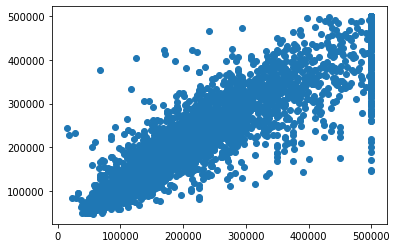

In [36]:
import matplotlib.pyplot as plt
plt.scatter(ytest,predictions)

Text(0.5, 0, 'True values')

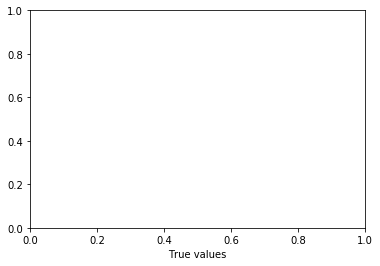

In [37]:
plt.xlabel('True values')

Text(0, 0.5, 'predictions')

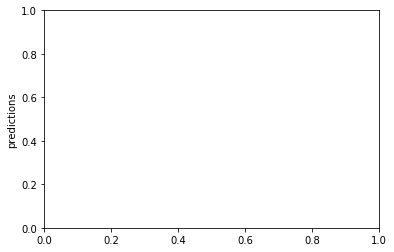

In [38]:
plt.ylabel('predictions')

In [40]:
plt.show()

In [17]:
# RMSE and R2 
print(sqrt(mean_squared_error(ytest, predictions)))
print(r2_score(ytest,predictions))

71098.69982050016
0.6142406531011806


# Decision Tree 

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=20)


In [19]:
dtree.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
predictions = dtree.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))
print(r2_score(ytest,predictions))

68995.10859449934
0.6367298233596475


#  Hyper Tuning

In [21]:
dtree = DecisionTreeRegressor(max_depth=40,max_features = None,min_samples_leaf = 2,min_samples_split = 3,random_state= 42)
dtree.fit(xtrain, ytrain)
predictions = dtree.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))
print(r2_score(ytest,predictions))

63888.32866497393
0.6885156766032654


In [22]:
dtree = DecisionTreeRegressor(max_depth=100,max_features = None,min_samples_leaf = 5,min_samples_split = 4,random_state= 42)
dtree.fit(xtrain, ytrain)
predictions = dtree.predict(xtest)
print(sqrt(mean_squared_error(ytest, predictions)))
print(r2_score(ytest,predictions))

59967.13858872087
0.7255774517550831


# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rforest=RandomForestRegressor(max_depth=20)

In [24]:
rforest.fit(xtrain,ytrain)

c:\users\hello\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [25]:
predictions=rforest.predict(xtest)
print(sqrt(mean_squared_error(ytest,predictions)))
print(r2_score(ytest,predictions))

53456.964085052416
0.7819270886691646


# Hyper Tuning 

In [26]:
rforest=RandomForestRegressor(n_estimators=100,max_depth=50,min_samples_split=4,min_samples_leaf=4)
rforest.fit(xtrain,ytrain)
predictions=rforest.predict(xtest)
print(sqrt(mean_squared_error(ytest,predictions)))
print(r2_score(ytest,predictions))

50189.68583826883
0.8077695890083378


In [41]:
dropcolumns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','ocean_proximity']
income=X.drop(dropcolumns,axis=1)

In [42]:
xtrain1,xtest1,ytrain1,ytest1=model_selection.train_test_split(income,y,test_size=0.2,random_state=42)

In [43]:
li =LinearRegression()
li.fit(xtrain1,ytrain1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
ypred1=li.predict(xtest1)
print(ypred1[0:4])
print(ytest1[0:4])
print(ytrain1[0:4])

[114958.91676996 150606.88213964 190393.71844449 285059.38345102]
20046     47700
3024      45800
15663    500001
20484    218600
Name: median_house_value, dtype: int64
14196    103000
8267     382100
17445    172600
14265     93400
Name: median_house_value, dtype: int64


Text(0, 0.5, 'median_house_value')

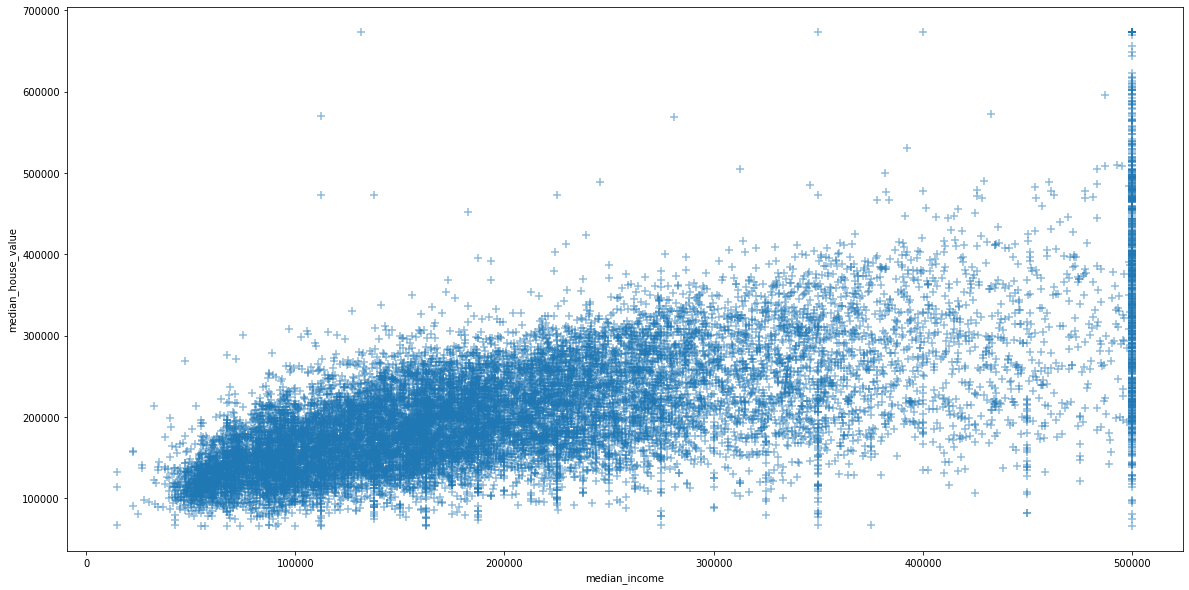

In [49]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10))
plt.scatter(ytrain1,li.predict(xtrain1),marker="+",s=50,alpha=0.5)
plt.xlabel("median_income")
plt.ylabel("median_house_value")

Text(0, 0.5, 'median_house_value')

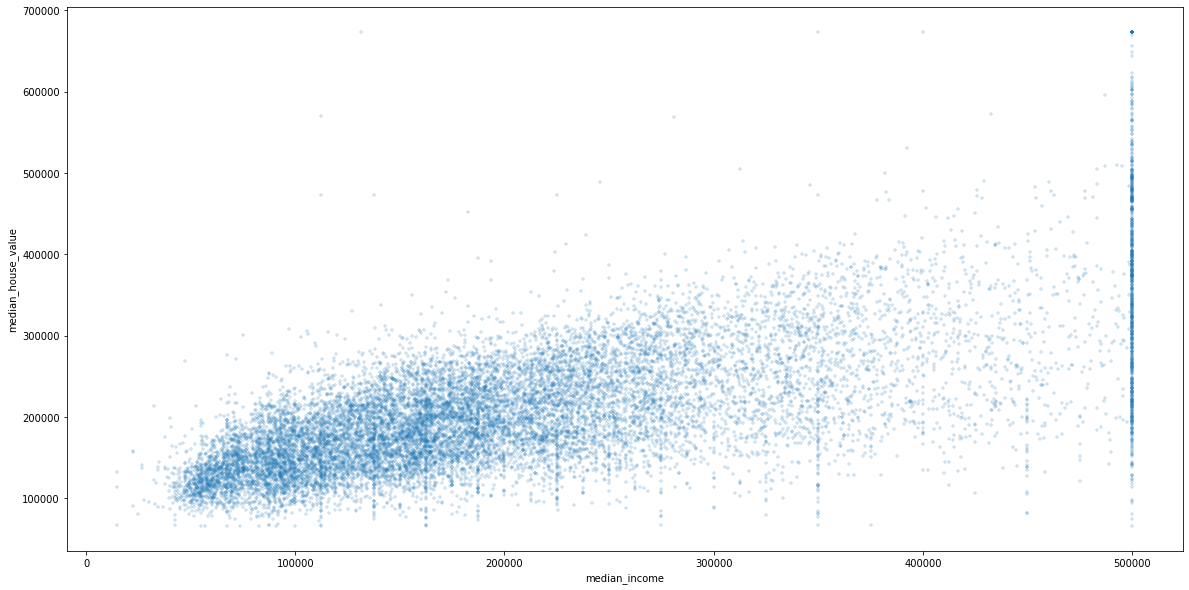

In [52]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10))
plt.scatter(ytrain1,li.predict(xtrain1),marker="+",s=10,alpha=0.2)
plt.xlabel("median_income")
plt.ylabel("median_house_value")